## Introdução

Este arquivo será utilizado para o pré-processamento dos dados presente no arquivo **Tabela_Taco_Atualizada.csv** para o modelo preditivo de classificação.

## Carregando o arquivo

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/LucaseNogueira/ClassificarAlimentosData/main/data/Atualizada/Tabela_Taco_Atualizada.csv'
#url = '/content/Tabela_Taco_Atualizada.csv'
df = pd.read_csv(url)
df

,Código do alimento,Descrição do alimento,Código da preparação,Descrição da preparação,Energia (kcal),Proteína (g),Lipídios totais (g),Carboidrato (g),Fibra alimentar total (g),Colesterol (mg),...,Riboflavina (mg),Niacina (mg),Niacina (NE) (mg),Piridoxina (mg),Cobalamina (mcg),Folato (DFE) (mcg),Vitamina D (mcg),Vitamina E (mg),Vitamina C (mg),Grupo Alimentar
0,6300101,"Arroz (polido, parboilizado, agulha, agulhinha...",99.0,Não se aplica,135.6229457071333,2.4961126633333333,1.200042,27.784863469999994,1.5457021999999998,-,...,-,-,-,-,-,-,-,0.0797818,-,Cereais e leguminosas
1,6300201,Arroz integral,99.0,Não se aplica,130.9456437535,2.56288515,1.9657966666666666,25.55681445,2.722389866666667,-,...,-,-,-,0.079216,-,-,-,0.0797818,-,Cereais e leguminosas
2,6300701,Milho (em grão),1.0,Cru(a),160.141,3.32,7.178,25.11,4.25,-,...,0.072,1.614,1.997,0.06,-,46,-,0.572,6.2,Cereais e leguminosas
3,6300701,Milho (em grão),2.0,Cozido(a),160.141,3.32,7.178,25.11,4.25,-,...,0.072,1.614,1.997,0.06,-,46,-,0.572,6.2,Cereais e leguminosas
4,6300701,Milho (em grão),3.0,Grelhado(a)/brasa/churrasco,160.141,3.32,7.178,25.11,4.25,-,...,0.072,1.614,1.997,0.06,-,46,-,0.572,6.2,Cereais e leguminosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,8579003,Maria izabel,99.0,Não se aplica,154,10.8,7.1,11.6,1.5,36,...,-,-,-,0.07,-,-,-,-,-,Miscelâneas
1967,8579004,Arroz de leite,99.0,Não se aplica,142.422,2.98,4.174,22.622,0.303,2.744,...,0.068,1.183,1.93,0.077,0.121,35.38,0.274,0.297,0.006,Miscelâneas
1968,8579005,Arroz com mandioca,99.0,Não se aplica,130.31147285356667,1.5480563316666667,0.750021,28.942431735,1.5728510999999998,-,...,-,-,-,0.015,-,-,-,-,5.55,Miscelâneas
1969,8579006,Arroz com ovo,99.0,Não se aplica,179.10697285356667,8.085056331666667,9.427021,14.500931734999996,0.7728510999999999,230.435,...,0.279,0.035,1.4205,0.066,0.6035,23.913,0.6955,0.81,-,Miscelâneas


## Analisando os dados

Vamos verificar as informações deste dataframe e verificar o que precisa ser feito.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código do alimento         1971 non-null   int64  
 1   Descrição do alimento      1971 non-null   object 
 2   Código da preparação       1971 non-null   float64
 3   Descrição da preparação    1971 non-null   object 
 4   Energia (kcal)             1971 non-null   object 
 5   Proteína (g)               1971 non-null   object 
 6   Lipídios totais (g)        1971 non-null   object 
 7   Carboidrato (g)            1971 non-null   object 
 8   Fibra alimentar total (g)  1971 non-null   object 
 9   Colesterol (mg)            1971 non-null   object 
 10  AG Saturados (g)           1971 non-null   object 
 11  AG Mono (g)                1971 non-null   object 
 12  AG Poli (g)                1971 non-null   object 
 13  AG Linoléico (g)           1971 non-null   objec

Não há ocorrencia de dados nulos em nenhuma coluna, assim podemos começar a nossa etapa de pré-processamento.

## Validando as colunas númericas Grupo Alimentar e Código de Preparação

Ambas as colunas são categoricas, semelhantes a enumeradores na programação ou hash-maps que possuem código e descrição (porém neste caso só importa o código). Já sabemos que elas são numéricas mas não sabemos os valores destas colunas. Vamos verificar

In [ ]:
#for col in ['Código da preparação', 'Código Grupo Alimentar']:
#for col in ['Grupo Alimentar']:
for col in ['Código da preparação']:
  print(f"Coluna: {col}")
  print(df[col].unique())
  print("-"*30)

Coluna: Código da preparação
[99.  1.  2.  3.  4.  7. 13. 14. 15.  5.  8.  9. 10. 11.  6. 12.]
------------------------------


Podemos ver que não possue valores inconformes. Por comodidade, vou transformar a coluna **Código da Preparação** em um **int64**, pois não vejo sentido em mante-la como **float64**.

In [ ]:
df['Código da preparação'] = df['Código da preparação'].astype('int64')
df['Código da preparação'].unique()

array([99,  1,  2,  3,  4,  7, 13, 14, 15,  5,  8,  9, 10, 11,  6, 12])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Código do alimento         1971 non-null   int64 
 1   Descrição do alimento      1971 non-null   object
 2   Código da preparação       1971 non-null   int64 
 3   Descrição da preparação    1971 non-null   object
 4   Energia (kcal)             1971 non-null   object
 5   Proteína (g)               1971 non-null   object
 6   Lipídios totais (g)        1971 non-null   object
 7   Carboidrato (g)            1971 non-null   object
 8   Fibra alimentar total (g)  1971 non-null   object
 9   Colesterol (mg)            1971 non-null   object
 10  AG Saturados (g)           1971 non-null   object
 11  AG Mono (g)                1971 non-null   object
 12  AG Poli (g)                1971 non-null   object
 13  AG Linoléico (g)           1971 non-null   object
 14  AG Linol

## Validando as tabelas de tipo Object

Primeiro vamos capturar o nome de todas as colunas com excessão das duas numericas.

In [ ]:
colunas_object = df.columns.delete([0, 38])
colunas_object

Index(['Descrição do alimento', 'Código da preparação',
       'Descrição da preparação', 'Energia (kcal)', 'Proteína (g)',
       'Lipídios totais (g)', 'Carboidrato (g)', 'Fibra alimentar total (g)',
       'Colesterol (mg)', 'AG Saturados (g)', 'AG Mono (g)', 'AG Poli (g)',
       'AG Linoléico (g)', 'AG Linolênico (g)', 'AG Trans total(g)',
       'Açúcar total (g)', 'Açúcar de adição (g)', 'Cálcio (mg)',
       'Magnésio (mg)', 'Manganês (mg)', 'Fósforo (mg)', 'Ferro (mg)',
       'Sódio (mg)', 'Sódio de adição (mg)', 'Potássio (mg)', 'Cobre (mg)',
       'Zinco (mg)', 'Selênio (mcg)', 'Retinol (mcg)',
       'Vitamina A (RAE) (mcg)', 'Tiamina (mg)', 'Riboflavina (mg)',
       'Niacina (mg)', 'Niacina (NE) (mg)', 'Piridoxina (mg)',
       'Cobalamina (mcg)', 'Folato (DFE) (mcg)', 'Vitamina E (mg)',
       'Vitamina C (mg)', 'Grupo Alimentar'],
      dtype='object')

Agora vamos tentar converter todas as colunas. Caso não for possível converter alguma coluna nós devemos reserva-la numa variavel e analisar o seu caso com mais atenção.

Todas as colunas **Object** serão convertidas para o tipo **float64**

In [ ]:
colunas_nao_convertidas = []
for col in colunas_object:
  try:
    df[col] = df[col].astype('float64')
  except:
    colunas_nao_convertidas.append(col)

colunas_nao_convertidas

['Descrição do alimento',
 'Descrição da preparação',
 'Energia (kcal)',
 'Proteína (g)',
 'Lipídios totais (g)',
 'Carboidrato (g)',
 'Fibra alimentar total (g)',
 'Colesterol (mg)',
 'AG Saturados (g)',
 'AG Mono (g)',
 'AG Poli (g)',
 'AG Linoléico (g)',
 'AG Linolênico (g)',
 'AG Trans total(g)',
 'Açúcar total (g)',
 'Açúcar de adição (g)',
 'Cálcio (mg)',
 'Magnésio (mg)',
 'Manganês (mg)',
 'Fósforo (mg)',
 'Ferro (mg)',
 'Sódio (mg)',
 'Sódio de adição (mg)',
 'Potássio (mg)',
 'Cobre (mg)',
 'Zinco (mg)',
 'Selênio (mcg)',
 'Retinol (mcg)',
 'Vitamina A (RAE) (mcg)',
 'Tiamina (mg)',
 'Riboflavina (mg)',
 'Niacina (mg)',
 'Niacina (NE) (mg)',
 'Piridoxina (mg)',
 'Cobalamina (mcg)',
 'Folato (DFE) (mcg)',
 'Vitamina E (mg)',
 'Vitamina C (mg)',
 'Grupo Alimentar']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código do alimento         1971 non-null   int64  
 1   Descrição do alimento      1971 non-null   object 
 2   Código da preparação       1971 non-null   float64
 3   Descrição da preparação    1971 non-null   object 
 4   Energia (kcal)             1971 non-null   object 
 5   Proteína (g)               1971 non-null   object 
 6   Lipídios totais (g)        1971 non-null   object 
 7   Carboidrato (g)            1971 non-null   object 
 8   Fibra alimentar total (g)  1971 non-null   object 
 9   Colesterol (mg)            1971 non-null   object 
 10  AG Saturados (g)           1971 non-null   object 
 11  AG Mono (g)                1971 non-null   object 
 12  AG Poli (g)                1971 non-null   object 
 13  AG Linoléico (g)           1971 non-null   objec

A sorte não esta do nosso lado XD

## Validando colunas isoladas: Energia (kcal)

Vamos ver o que esta rolando

In [ ]:
try:
  df['Energia (kcal)'] = df['Energia (kcal)'].astype('float64')
except Exception as e:
  print('Tratamento de excessão: ' + str(e))

Tratamento de excessão: could not convert string to float: '-'


Existe o valor **'-'** na coluna **Energia (kcal)** que esta impossibilitando a conversão da coluna. Aparentemente este valor representa algo como *nulo* ou *vazio*. Neste caso podemos substituir este valor por **0 (zero)**.

In [ ]:
df['Energia (kcal)'].replace('-', '0', inplace=True)

<ipython-input-73-bc222d3fe8f1>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print('Ocorrencias de -:')
print(df['Energia (kcal)'].loc[df['Energia (kcal)'] == '-'])
print('-'*30)
print('Ocorrencias de 0:')
print(df['Energia (kcal)'].loc[df['Energia (kcal)'] == '0'])

Ocorrencias de -:
Series([], Name: Energia (kcal), dtype: object)
------------------------------
Ocorrencias de 0:
567     0
669     0
1717    0
1718    0
1719    0
1742    0
1743    0
1744    0
1745    0
Name: Energia (kcal), dtype: object


Agora que realizamos a substituição de valore nós podemos tentar, novamente, a transformação da coluna para **float64**

In [ ]:
try:
  df['Energia (kcal)'] = df['Energia (kcal)'].astype('float64')
except Exception as e:
  print('Tratamento de excessão: ' + str(e))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código do alimento         1971 non-null   int64  
 1   Descrição do alimento      1971 non-null   object 
 2   Código da preparação       1971 non-null   float64
 3   Descrição da preparação    1971 non-null   object 
 4   Energia (kcal)             1971 non-null   float64
 5   Proteína (g)               1971 non-null   object 
 6   Lipídios totais (g)        1971 non-null   object 
 7   Carboidrato (g)            1971 non-null   object 
 8   Fibra alimentar total (g)  1971 non-null   object 
 9   Colesterol (mg)            1971 non-null   object 
 10  AG Saturados (g)           1971 non-null   object 
 11  AG Mono (g)                1971 non-null   object 
 12  AG Poli (g)                1971 non-null   object 
 13  AG Linoléico (g)           1971 non-null   objec

Coluna tratada com sucesso. Com este exemplo bem sucedido, podemos aplicar a mesma formula para as demais colunas e ver no que vai dar.

## Validando as colunas de tipo Object com o desenvolvimento aplicado na coluna Energia (kcal)

Vamos utilizar o nosso vetor **colunas_object** para coletar o nomes das colunas que precisam ser tratadas. Porém, precisamos retirar a coluna **Energia (kcal)**, pois ela já foi tratada.

In [ ]:
colunas_object = colunas_object.delete(0)
colunas_object

Index(['Código da preparação', 'Descrição da preparação', 'Energia (kcal)',
       'Proteína (g)', 'Lipídios totais (g)', 'Carboidrato (g)',
       'Fibra alimentar total (g)', 'Colesterol (mg)', 'AG Saturados (g)',
       'AG Mono (g)', 'AG Poli (g)', 'AG Linoléico (g)', 'AG Linolênico (g)',
       'AG Trans total(g)', 'Açúcar total (g)', 'Açúcar de adição (g)',
       'Cálcio (mg)', 'Magnésio (mg)', 'Manganês (mg)', 'Fósforo (mg)',
       'Ferro (mg)', 'Sódio (mg)', 'Sódio de adição (mg)', 'Potássio (mg)',
       'Cobre (mg)', 'Zinco (mg)', 'Selênio (mcg)', 'Retinol (mcg)',
       'Vitamina A (RAE) (mcg)', 'Tiamina (mg)', 'Riboflavina (mg)',
       'Niacina (mg)', 'Niacina (NE) (mg)', 'Piridoxina (mg)',
       'Cobalamina (mcg)', 'Folato (DFE) (mcg)', 'Vitamina E (mg)',
       'Vitamina C (mg)', 'Grupo Alimentar'],
      dtype='object')

Agora podemos aplicar o desenvolvimento. Vamos adicionar alguns tratamentos de excessões para podermos mapear os erros com mais segurança.

In [ ]:
colunas_nao_convertidas = []
for col in colunas_object:
  try:
    df[col] = df[col].astype('float64')
    print('Coluna convertida com sucesso!!!')
  except Exception as e:
    colunas_nao_convertidas.append({col:str(e)})
    print('Tratamento de excessão: ' + str(e))

Coluna convertida com sucesso!!!
Tratamento de excessão: could not convert string to float: 'Não se aplica'
Coluna convertida com sucesso!!!
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not convert string to float: '-'
Tratamento de excessão: could not conver

In [ ]:
colunas_nao_alteradas = []
for col in colunas_object:
  try:
    df[col].replace('-', '0', inplace=True)
    print('Ocorrencias de -:')
    print(df[col].loc[df[col] == '-'])
    print('-'*30)
    print('Ocorrencias de 0:')
    print(df[col].loc[df[col] == '0'])
    print('\n\n')
  except Exception as e:
    colunas_nao_alteradas.append({col:str(e)})

Ocorrencias de -:
Series([], Name: Código da preparação, dtype: float64)
------------------------------
Ocorrencias de 0:
Series([], Name: Código da preparação, dtype: float64)



Ocorrencias de -:
Series([], Name: Descrição da preparação, dtype: object)
------------------------------
Ocorrencias de 0:
Series([], Name: Descrição da preparação, dtype: object)



Ocorrencias de -:
Series([], Name: Energia (kcal), dtype: float64)
------------------------------
Ocorrencias de 0:
Series([], Name: Energia (kcal), dtype: float64)



Ocorrencias de -:
Series([], Name: Proteína (g), dtype: object)
------------------------------
Ocorrencias de 0:
458     0
527     0
529     0
530     0
533     0
       ..
1855    0
1856    0
1857    0
1858    0
1859    0
Name: Proteína (g), Length: 73, dtype: object



Ocorrencias de -:

<ipython-input-78-1459ec2cab78>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.






Series([], Name: Lipídios totais (g), dtype: object)
------------------------------
Ocorrencias de 0:
167     0
172     0
174     0
486     0
489     0
       ..
1857    0
1858    0
1859    0
1895    0
1897    0
Name: Lipídios totais (g), Length: 87, dtype: object



Ocorrencias de -:
Series([], Name: Carboidrato (g), dtype: object)
------------------------------
Ocorrencias de 0:
567     0
669     0
693     0
694     0
695     0
       ..
1789    0
1797    0
1875    0
1876    0
1899    0
Name: Carboidrato (g), Length: 573, dtype: object



Ocorrencias de -:
Series([], Name: Fibra alimentar total (g), dtype: object)
------------------------------
Ocorrencias de 0:
167     0
172     0
210     0
213     0
237     0
       ..
1895    0
1897    0
1899    0
1916    0
1928    0
Name: Fibra alimentar total (g), Length: 858, dtype: object



Ocorrencias de -:
Series([], Name: Colesterol (mg), dtype: object)
------------------------------
Ocorrencias de 0:
0       0
1       0
2       0
3      

In [ ]:
print('Ocorrências de colunas não alteradas:')
if len(colunas_nao_alteradas) != 0:
  for obj in colunas_nao_alteradas:
    print(obj)
else:
  print('0 (zero)')

Ocorrências de colunas não alteradas:
0 (zero)


In [ ]:
colunas_nao_convertidas = []
for col in colunas_object:
  try:
    df[col] = df[col].astype('float64')
    print('Coluna convertida com sucesso!!!')
  except Exception as e:
    colunas_nao_convertidas.append({col:str(e)})
    print('Tratamento de excessão: ' + str(e))

df.info()

Coluna convertida com sucesso!!!
Tratamento de excessão: could not convert string to float: 'Não se aplica'
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
Coluna convertida com sucesso!!!
C

Todas as colunas tiveram seu tipo alterado com excessão da coluna **Vitamina E (mg)**. Foi emitido uma excessão durante a tentativa de converte-la e esta excessão deve ser analisada.

## Validando colunas isoladas: Vitamina E (mg)

Analisando a excessão temos ``could not convert string to float: '0,02'``. Não é muito dificil entender o motivo do erro quando sabemos como funciona os tipos flutuantes em **Python**. Este tipo separa os números utilizando **"." (ponto)** e não "," **(virgula)**. Vamos desenvolver um código capaz de tratar este problema.

In [ ]:
df['Vitamina E (mg)'] = df['Vitamina E (mg)'].str.replace(',','.')
try:
  df['Vitamina E (mg)'] = df['Vitamina E (mg)'].astype('float64')
  print('Coluna convertida com sucesso!!!')
except Exception as e:
  print('Tratamento de excessão: ' + str(e))

Coluna convertida com sucesso!!!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código do alimento         1971 non-null   int64  
 1   Descrição do alimento      1971 non-null   object 
 2   Código da preparação       1971 non-null   float64
 3   Descrição da preparação    1971 non-null   object 
 4   Energia (kcal)             1971 non-null   float64
 5   Proteína (g)               1971 non-null   float64
 6   Lipídios totais (g)        1971 non-null   float64
 7   Carboidrato (g)            1971 non-null   float64
 8   Fibra alimentar total (g)  1971 non-null   float64
 9   Colesterol (mg)            1971 non-null   float64
 10  AG Saturados (g)           1971 non-null   float64
 11  AG Mono (g)                1971 non-null   float64
 12  AG Poli (g)                1971 non-null   float64
 13  AG Linoléico (g)           1971 non-null   float

## Validando colunas isoladas: Vitamina D (mcg)

In [ ]:
#df['Vitamina D (mcg)'] = df['Vitamina D (mcg)'].astype('float64')

In [ ]:
df['Vitamina D (mcg)'].replace('-', '0', inplace=True)

<ipython-input-84-173d02f95ecc>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['Vitamina D (mcg)'] = df['Vitamina D (mcg)'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código do alimento         1971 non-null   int64  
 1   Descrição do alimento      1971 non-null   object 
 2   Código da preparação       1971 non-null   float64
 3   Descrição da preparação    1971 non-null   object 
 4   Energia (kcal)             1971 non-null   float64
 5   Proteína (g)               1971 non-null   float64
 6   Lipídios totais (g)        1971 non-null   float64
 7   Carboidrato (g)            1971 non-null   float64
 8   Fibra alimentar total (g)  1971 non-null   float64
 9   Colesterol (mg)            1971 non-null   float64
 10  AG Saturados (g)           1971 non-null   float64
 11  AG Mono (g)                1971 non-null   float64
 12  AG Poli (g)                1971 non-null   float64
 13  AG Linoléico (g)           1971 non-null   float

## Clonando o DataFrame

Aqui vamos clonar o Dataframe para termos 2 dataframes, um que irá conter as colunas (útil na analise exploratória) e outro sem estas colunas (este será usado no modelo de aprendizagem de máquina)

In [ ]:
df_clone = df.copy()

## Excluindo colunas desnecessárias para o modelo

Sabemos que colunas textuais só são relevantes caso eles sejam categóricas. Temos a sorte de as unicas colunas textuais em nosso dataframe serem colunas que já possuem as suas representações numericas, sendo elas **Descrição da Preparação** com **Código da Preparação** e **Descrição do Alimento** com **Código do Alimento**. Sendo assim podemos excluir estas colunas descritivas.

In [ ]:
df.drop(['Descrição da preparação', 'Descrição do alimento'], axis='columns', inplace=True)
#df.drop(['Descrição da preparação', 'Descrição do alimento', 'Descrição Grupo Alimentar'], axis='columns', inplace=True)

Também podemos excluir a coluna **Código do Alimento**. Ela é uma coluna unica e categorica, mas para um modelo de aprendizagem de máquina, esta coluna não irá representar dados estatisticos.

In [ ]:
df.drop('Código do alimento', axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código da preparação       1971 non-null   float64
 1   Energia (kcal)             1971 non-null   float64
 2   Proteína (g)               1971 non-null   float64
 3   Lipídios totais (g)        1971 non-null   float64
 4   Carboidrato (g)            1971 non-null   float64
 5   Fibra alimentar total (g)  1971 non-null   float64
 6   Colesterol (mg)            1971 non-null   float64
 7   AG Saturados (g)           1971 non-null   float64
 8   AG Mono (g)                1971 non-null   float64
 9   AG Poli (g)                1971 non-null   float64
 10  AG Linoléico (g)           1971 non-null   float64
 11  AG Linolênico (g)          1971 non-null   float64
 12  AG Trans total(g)          1971 non-null   float64
 13  Açúcar total (g)           1971 non-null   float

Com a exclusão das colunas nós podemos verificar se existem inconformidades nas colunas númericas. Além disso podemos tratar a conversão das colunas de tipo **object** para **float64** ou **int64**

## Analisando amostras por classe

Vamos a quantidade de amostras por classe e identificar possíveis ruidos. Para auxiliar visualização dos dados, vamos utilizar a biblioteca **plotly**

In [ ]:
#px.histogram(df_clone, 'Descrição Grupo Alimentar', text_auto=True)
px.histogram(df_clone, 'Grupo Alimentar', text_auto=True)

Vamos dar uma olhada na quantidade de alimentos por tipo de preparo

In [ ]:
px.histogram(df_clone, 'Descrição da preparação', text_auto=True)

Agora vamos retirar as colunas referentes ao preparo e verificar a quantidade de valores repetidos e analisar o resultado. Este estudo é necessário para analisarmos os riscos de manter as colunas referentes a preparação.

df_clone.duplicated(subset=[
    'Código do alimento',
    'Código da preparação',
    'Descrição da preparação',
    'Descrição do alimento',
    'Descrição Grupo Alimentar']).sum()

In [ ]:
#df_clone.duplicated(subset=df_clone.columns.difference([
#    'Código do alimento',
#    'Código da preparação',
#    'Descrição da preparação',
#    'Descrição do alimento',
#    'Descrição Grupo Alimentar'
#])).sum()
df_clone.duplicated(subset=df_clone.columns.difference([
    'Código do alimento',
    'Código da preparação',
    'Descrição da preparação',
    'Descrição do alimento',
    'Grupo Alimentar'
])).sum()


1159

Verificando as colunas que foram consideradas

In [ ]:
#df_clone.columns.difference([
#    'Código do alimento',
#    'Código da preparação',
#    'Descrição da preparação',
#    'Descrição do alimento',
#    'Descrição Grupo Alimentar'
#])
df_clone.columns.difference([
    'Código do alimento',
    'Código da preparação',
    'Descrição da preparação',
    'Descrição do alimento',
    'Grupo Alimentar'
])

Index(['AG Linoléico (g)', 'AG Linolênico (g)', 'AG Mono (g)', 'AG Poli (g)',
       'AG Saturados (g)', 'AG Trans total(g)', 'Açúcar de adição (g)',
       'Açúcar total (g)', 'Carboidrato (g)', 'Cobalamina (mcg)', 'Cobre (mg)',
       'Colesterol (mg)', 'Cálcio (mg)', 'Energia (kcal)', 'Ferro (mg)',
       'Fibra alimentar total (g)', 'Folato (DFE) (mcg)', 'Fósforo (mg)',
       'Lipídios totais (g)', 'Magnésio (mg)', 'Manganês (mg)',
       'Niacina (NE) (mg)', 'Niacina (mg)', 'Piridoxina (mg)', 'Potássio (mg)',
       'Proteína (g)', 'Retinol (mcg)', 'Riboflavina (mg)', 'Selênio (mcg)',
       'Sódio (mg)', 'Sódio de adição (mg)', 'Tiamina (mg)',
       'Vitamina A (RAE) (mcg)', 'Vitamina C (mg)', 'Vitamina D (mcg)',
       'Vitamina E (mg)', 'Zinco (mg)'],
      dtype='object')

In [ ]:
#df_clone[df_clone.duplicated(subset=df_clone.columns.difference([
#    'Código do alimento',
#    'Código da preparação',
#    'Descrição da preparação',
#    'Descrição do alimento',
#    'Descrição Grupo Alimentar'
#]))]
df_clone[df_clone.duplicated(subset=df_clone.columns.difference([
    'Código do alimento',
    'Código da preparação',
    'Descrição da preparação',
    'Descrição do alimento',
    'Grupo Alimentar'
]))]

,Código do alimento,Descrição do alimento,Código da preparação,Descrição da preparação,Energia (kcal),Proteína (g),Lipídios totais (g),Carboidrato (g),Fibra alimentar total (g),Colesterol (mg),...,Riboflavina (mg),Niacina (mg),Niacina (NE) (mg),Piridoxina (mg),Cobalamina (mcg),Folato (DFE) (mcg),Vitamina D (mcg),Vitamina E (mg),Vitamina C (mg),Grupo Alimentar
3,6300701,Milho (em grão),2.0,Cozido(a),160.141000,3.320000,7.178000,25.110000,4.250000,0.000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
4,6300701,Milho (em grão),3.0,Grelhado(a)/brasa/churrasco,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
5,6300701,Milho (em grão),4.0,Assado(a),160.141000,3.320000,7.178000,25.110000,4.250000,0.000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
7,6300701,Milho (em grão),13.0,Ensopado,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
8,6300701,Milho (em grão),99.0,Não se aplica,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,8508012,Macarrão pronto light,2.0,Cozido(a),189.862000,5.645000,7.177000,25.537000,1.160000,8.276,...,0.19500,1.13400,2.45200,0.05800,0.214000,81.112,0.373000,0.427000,0.092,Miscelâneas
1945,8508101,Farofa pronta light em pacote,99.0,Não se aplica,406.000000,2.100000,9.100000,80.300000,7.800000,0.000,...,0.00000,0.00000,0.00000,0.15000,0.000000,0.000,0.000000,0.000000,0.000,Miscelâneas
1949,8509801,Café da manha,99.0,Não se aplica,31.441000,1.721000,1.686000,2.566000,0.235000,5.157,...,0.13200,0.15100,0.79500,0.01900,0.227000,3.579,0.516000,0.036000,0.000,Miscelâneas
1954,8570105,Prato de comida do sul,99.0,Não se aplica,148.374134,6.740454,3.860557,21.340794,2.310169,7.000,...,0.07144,0.82612,2.06872,0.05908,0.264133,55.152,0.065333,0.387093,0.000,Miscelâneas


In [ ]:
print(df_clone['Descrição do alimento'].value_counts().to_string())

Descrição do alimento
Macarrão                                                             15
Frango em pedaços                                                    14
Batata-inglesa                                                       13
Ovo de galinha                                                       12
Filé de frango                                                       12
Peito de galinha ou frango                                           12
Carne de galinha                                                     12
Batata (não especificada)                                            12
Salsicha no varejo                                                   12
Couve                                                                11
Cenoura                                                              11
Linguiça (suína, bovina, mista, etc.)                                11
Peixe de água doce (inteiro, em posta, em filé, etc.)                11
Camarão                                   

In [ ]:
#df_clone[df_clone['Descrição Grupo Alimentar']  == 'Miscelâneas']
df_clone[df_clone['Grupo Alimentar']  == 'Miscelâneas']

,Código do alimento,Descrição do alimento,Código da preparação,Descrição da preparação,Energia (kcal),Proteína (g),Lipídios totais (g),Carboidrato (g),Fibra alimentar total (g),Colesterol (mg),...,Riboflavina (mg),Niacina (mg),Niacina (NE) (mg),Piridoxina (mg),Cobalamina (mcg),Folato (DFE) (mcg),Vitamina D (mcg),Vitamina E (mg),Vitamina C (mg),Grupo Alimentar
1790,8500201,Salgadinho,99.0,Não se aplica,274.600000,13.409000,16.878000,16.544000,0.876000,107.652,...,0.265,3.011,4.6230,0.190,1.2700,50.528,0.6440,1.008,1.647,Miscelâneas
1791,8500202,"Pastel (queijo, carne, palmito, etc.)",99.0,Não se aplica,319.807000,10.384000,15.676000,33.513000,1.447000,61.192,...,0.303,3.330,5.4640,0.100,0.2800,92.196,0.4910,1.212,1.185,Miscelâneas
1792,8500203,Croquete,99.0,Não se aplica,274.600000,13.409000,16.878000,16.544000,0.876000,107.652,...,0.265,3.011,4.6230,0.190,1.2700,50.528,0.6440,1.008,1.647,Miscelâneas
1793,8500205,Coxinha,99.0,Não se aplica,274.600000,13.409000,16.878000,16.544000,0.876000,107.652,...,0.265,3.011,4.6230,0.190,1.2700,50.528,0.6440,1.008,1.647,Miscelâneas
1794,8500206,"Empada (queijo, carne, camarão, etc.)",99.0,Não se aplica,153.963000,7.887000,7.908000,12.471000,1.030000,17.316,...,0.109,3.624,5.0240,0.132,0.1040,33.268,0.0320,0.216,1.783,Miscelâneas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,8579003,Maria izabel,99.0,Não se aplica,154.000000,10.800000,7.100000,11.600000,1.500000,36.000,...,0.000,0.000,0.0000,0.070,0.0000,0.000,0.0000,0.000,0.000,Miscelâneas
1967,8579004,Arroz de leite,99.0,Não se aplica,142.422000,2.980000,4.174000,22.622000,0.303000,2.744,...,0.068,1.183,1.9300,0.077,0.1210,35.380,0.2740,0.297,0.006,Miscelâneas
1968,8579005,Arroz com mandioca,99.0,Não se aplica,130.311473,1.548056,0.750021,28.942432,1.572851,0.000,...,0.000,0.000,0.0000,0.015,0.0000,0.000,0.0000,0.000,5.550,Miscelâneas
1969,8579006,Arroz com ovo,99.0,Não se aplica,179.106973,8.085056,9.427021,14.500932,0.772851,230.435,...,0.279,0.035,1.4205,0.066,0.6035,23.913,0.6955,0.810,0.000,Miscelâneas


Os resultados anteriores apresentaram insights quanto a base de dados. Desta forma vou remover todos os dados duplicados.

In [ ]:
#df_clone.drop_duplicates(subset=df_clone.columns.difference([
#    'Código do alimento',
#    'Código da preparação',
#    'Descrição da preparação',
#    'Descrição do alimento',
#    'Descrição Grupo Alimentar'
#]), inplace=True)
df_clone.drop_duplicates(subset=df_clone.columns.difference([
    'Código do alimento',
    'Código da preparação',
    'Descrição da preparação',
    'Descrição do alimento',
    'Grupo Alimentar'
]), inplace=True)

df_clone

,Código do alimento,Descrição do alimento,Código da preparação,Descrição da preparação,Energia (kcal),Proteína (g),Lipídios totais (g),Carboidrato (g),Fibra alimentar total (g),Colesterol (mg),...,Riboflavina (mg),Niacina (mg),Niacina (NE) (mg),Piridoxina (mg),Cobalamina (mcg),Folato (DFE) (mcg),Vitamina D (mcg),Vitamina E (mg),Vitamina C (mg),Grupo Alimentar
0,6300101,"Arroz (polido, parboilizado, agulha, agulhinha...",99.0,Não se aplica,135.622946,2.496113,1.200042,27.784863,1.545702,0.000,...,0.000,0.000,0.0000,0.000000,0.0000,0.000,0.0000,0.079782,0.000,Cereais e leguminosas
1,6300201,Arroz integral,99.0,Não se aplica,130.945644,2.562885,1.965797,25.556814,2.722390,0.000,...,0.000,0.000,0.0000,0.079216,0.0000,0.000,0.0000,0.079782,0.000,Cereais e leguminosas
2,6300701,Milho (em grão),1.0,Cru(a),160.141000,3.320000,7.178000,25.110000,4.250000,0.000,...,0.072,1.614,1.9970,0.060000,0.0000,46.000,0.0000,0.572000,6.200,Cereais e leguminosas
6,6300701,Milho (em grão),7.0,Refogado(a),160.141000,3.320000,7.178000,25.110000,4.250000,0.000,...,0.072,1.614,1.9970,0.060000,0.0000,46.000,0.0000,0.572000,6.200,Cereais e leguminosas
9,6300706,Canjiquinha de milho em grão,1.0,Cru(a),79.680000,1.237000,2.198000,13.503000,0.672000,0.000,...,0.071,0.906,1.0170,0.034000,0.0000,20.813,0.0000,0.182000,0.000,Cereais e leguminosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,8579002,Arroz carreteiro,99.0,Não se aplica,154.000000,10.800000,7.100000,11.600000,1.500000,36.000,...,0.000,0.000,0.0000,0.070000,0.0000,0.000,0.0000,0.000000,0.000,Miscelâneas
1967,8579004,Arroz de leite,99.0,Não se aplica,142.422000,2.980000,4.174000,22.622000,0.303000,2.744,...,0.068,1.183,1.9300,0.077000,0.1210,35.380,0.2740,0.297000,0.006,Miscelâneas
1968,8579005,Arroz com mandioca,99.0,Não se aplica,130.311473,1.548056,0.750021,28.942432,1.572851,0.000,...,0.000,0.000,0.0000,0.015000,0.0000,0.000,0.0000,0.000000,5.550,Miscelâneas
1969,8579006,Arroz com ovo,99.0,Não se aplica,179.106973,8.085056,9.427021,14.500932,0.772851,230.435,...,0.279,0.035,1.4205,0.066000,0.6035,23.913,0.6955,0.810000,0.000,Miscelâneas


In [ ]:
print(df_clone['Descrição do alimento'].value_counts().to_string())

Descrição do alimento
Filé-mignon                                                        6
Camarão                                                            5
Peixe de mar (inteiro, em posta, em filé, etc.)                    5
Couve                                                              5
Cenoura                                                            5
Cebola                                                             5
Macarrão                                                           5
Peito de galinha ou frango                                         5
Batata-inglesa                                                     5
Chuchu                                                             4
Berinjela                                                          4
Peixe de mar salgado (inteiro, em posta, em filé, etc.)            4
Frango inteiro                                                     4
Brócolis                                                           4
Abobrinha   

In [ ]:
px.histogram(df_clone, 'Descrição da preparação', text_auto=True)

In [ ]:
#px.histogram(df_clone, 'Descrição Grupo Alimentar', text_auto=True)
px.histogram(df_clone, 'Grupo Alimentar', text_auto=True)

In [ ]:
df_clone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 0 to 1970
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código do alimento         812 non-null    int64  
 1   Descrição do alimento      812 non-null    object 
 2   Código da preparação       812 non-null    float64
 3   Descrição da preparação    812 non-null    object 
 4   Energia (kcal)             812 non-null    float64
 5   Proteína (g)               812 non-null    float64
 6   Lipídios totais (g)        812 non-null    float64
 7   Carboidrato (g)            812 non-null    float64
 8   Fibra alimentar total (g)  812 non-null    float64
 9   Colesterol (mg)            812 non-null    float64
 10  AG Saturados (g)           812 non-null    float64
 11  AG Mono (g)                812 non-null    float64
 12  AG Poli (g)                812 non-null    float64
 13  AG Linoléico (g)           812 non-null    float64
 14

In [ ]:
df_clone.reset_index(drop=True, inplace=True)
df_clone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código do alimento         812 non-null    int64  
 1   Descrição do alimento      812 non-null    object 
 2   Código da preparação       812 non-null    float64
 3   Descrição da preparação    812 non-null    object 
 4   Energia (kcal)             812 non-null    float64
 5   Proteína (g)               812 non-null    float64
 6   Lipídios totais (g)        812 non-null    float64
 7   Carboidrato (g)            812 non-null    float64
 8   Fibra alimentar total (g)  812 non-null    float64
 9   Colesterol (mg)            812 non-null    float64
 10  AG Saturados (g)           812 non-null    float64
 11  AG Mono (g)                812 non-null    float64
 12  AG Poli (g)                812 non-null    float64
 13  AG Linoléico (g)           812 non-null    float64

In [ ]:
#df_clone.duplicated(subset=df_clone.columns.difference([
#    'Código do alimento',
#    'Código da preparação',
#    'Descrição da preparação',
#    'Descrição do alimento',
#    'Descrição Grupo Alimentar'
#])).sum()
df_clone.duplicated(subset=df_clone.columns.difference([
    'Código do alimento',
    'Código da preparação',
    'Descrição da preparação',
    'Descrição do alimento',
    'Grupo Alimentar'
])).sum()

0

## Identificação de Outliers

In [ ]:
df_clone.describe()

,Código do alimento,Código da preparação,Energia (kcal),Proteína (g),Lipídios totais (g),Carboidrato (g),Fibra alimentar total (g),Colesterol (mg),AG Saturados (g),AG Mono (g),...,Tiamina (mg),Riboflavina (mg),Niacina (mg),Niacina (NE) (mg),Piridoxina (mg),Cobalamina (mcg),Folato (DFE) (mcg),Vitamina D (mcg),Vitamina E (mg),Vitamina C (mg)
count,8.120000e+02,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.00000
mean,7.419211e+06,67.013547,191.964050,9.322364,9.034555,18.882181,1.950370,46.440053,3.073656,3.142404,...,0.138746,0.201426,2.149851,3.649916,0.162855,1.503443,35.957286,0.378127,0.797562,11.67835
std,7.172036e+05,44.643551,150.939104,9.861617,13.047611,23.519904,4.268205,135.445782,5.525443,5.696798,...,0.424178,0.455836,3.485885,4.751585,0.241344,7.725207,122.366247,1.235454,2.099843,84.82605
min,6.300101e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6.803676e+06,7.000000,64.023500,1.450500,0.457500,2.584000,0.000000,0.000000,0.060000,0.047000,...,0.030000,0.040000,0.200000,0.500000,0.036750,0.000000,4.000000,0.000000,0.070000,0.00000
50%,7.108053e+06,99.000000,158.000000,4.792000,4.104500,9.804500,0.981500,3.763000,1.057500,0.883500,...,0.067000,0.110000,0.821560,1.655000,0.095963,0.020000,11.181000,0.000000,0.350000,0.89000
75%,8.006626e+06,99.000000,281.560750,15.122750,12.759000,23.887750,2.302542,67.050000,3.904500,4.089250,...,0.138500,0.211000,2.906250,5.860000,0.200000,0.519250,38.697000,0.352500,0.724000,6.76975
max,8.800109e+06,99.000000,902.000000,61.300000,100.430000,100.000000,73.000000,3100.000000,81.107000,73.275000,...,11.000000,8.400000,50.000000,55.117000,2.320000,98.890000,3105.000000,16.000000,25.870000,1677.60000


## Atualizando Dataframe para o modelo preditivo

In [ ]:
df.duplicated(subset=df.columns.difference([
    'Código da preparação'
])).sum()

1117

In [ ]:
df_duplicados = df[df.duplicated(subset=df.columns.difference([
    'Código da preparação'
]))]
df_duplicados

,Código da preparação,Energia (kcal),Proteína (g),Lipídios totais (g),Carboidrato (g),Fibra alimentar total (g),Colesterol (mg),AG Saturados (g),AG Mono (g),AG Poli (g),...,Riboflavina (mg),Niacina (mg),Niacina (NE) (mg),Piridoxina (mg),Cobalamina (mcg),Folato (DFE) (mcg),Vitamina D (mcg),Vitamina E (mg),Vitamina C (mg),Grupo Alimentar
3,2.0,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,1.120000,1.71800,4.009000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
4,3.0,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,1.120000,1.71800,4.009000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
5,4.0,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,1.120000,1.71800,4.009000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
7,13.0,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,1.120000,1.71800,4.009000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
8,99.0,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,1.120000,1.71800,4.009000,...,0.07200,1.61400,1.99700,0.06000,0.000000,46.000,0.000000,0.572000,6.200,Cereais e leguminosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,99.0,53.993000,0.270000,0.020000,13.918000,0.600000,0.000,0.002000,0.00800,0.011000,...,0.01400,0.28800,0.28800,0.00700,0.000000,1.000,0.000000,0.290000,5.299,Miscelâneas
1945,99.0,406.000000,2.100000,9.100000,80.300000,7.800000,0.000,1.900000,2.40000,2.500000,...,0.00000,0.00000,0.00000,0.15000,0.000000,0.000,0.000000,0.000000,0.000,Miscelâneas
1949,99.0,31.441000,1.721000,1.686000,2.566000,0.235000,5.157,0.963000,0.42600,0.101000,...,0.13200,0.15100,0.79500,0.01900,0.227000,3.579,0.516000,0.036000,0.000,Miscelâneas
1954,99.0,148.374134,6.740454,3.860557,21.340794,2.310169,7.000,0.970893,1.15842,1.349055,...,0.07144,0.82612,2.06872,0.05908,0.264133,55.152,0.065333,0.387093,0.000,Miscelâneas


In [ ]:
def qtda_perc_format(pct, data_series):
  absolute = int(pct/100.*np.sum(data_series))
  return "{:d}({:.1f}%)".format(absolute, pct)

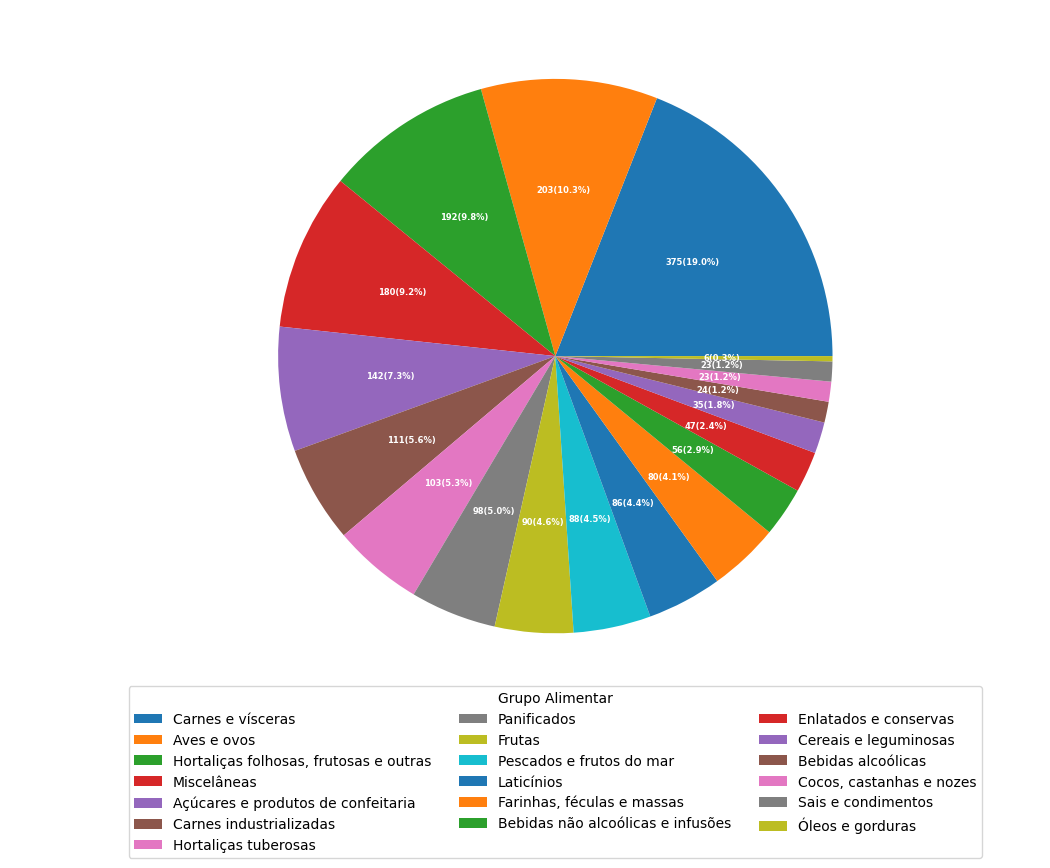

In [ ]:
df_count = df.value_counts('Grupo Alimentar')

fig, ax = plt.subplots(figsize=(9,9), subplot_kw=dict(aspect="equal"))
wedges, text, autotext = ax.pie(df_count, labels=df_count.index, autopct=lambda pct: qtda_perc_format(pct, df_count), textprops=dict(color="w"))
ax.legend(wedges,df_count.index, title="Grupo Alimentar", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.setp(autotext, size=6, weight="bold")
plt.show()

In [ ]:
#px.histogram(df, 'Código Grupo Alimentar', text_auto=True)
px.histogram(df, 'Grupo Alimentar', text_auto=True)

In [ ]:
px.histogram(df, 'Código da preparação', text_auto=True)

In [ ]:
df.drop_duplicates(subset=df.columns.difference([
    'Código da preparação',
    'Grupo Alimentar'
]), inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código da preparação       812 non-null    float64
 1   Energia (kcal)             812 non-null    float64
 2   Proteína (g)               812 non-null    float64
 3   Lipídios totais (g)        812 non-null    float64
 4   Carboidrato (g)            812 non-null    float64
 5   Fibra alimentar total (g)  812 non-null    float64
 6   Colesterol (mg)            812 non-null    float64
 7   AG Saturados (g)           812 non-null    float64
 8   AG Mono (g)                812 non-null    float64
 9   AG Poli (g)                812 non-null    float64
 10  AG Linoléico (g)           812 non-null    float64
 11  AG Linolênico (g)          812 non-null    float64
 12  AG Trans total(g)          812 non-null    float64
 13  Açúcar total (g)           812 non-null    float64

In [ ]:
df

,Código da preparação,Energia (kcal),Proteína (g),Lipídios totais (g),Carboidrato (g),Fibra alimentar total (g),Colesterol (mg),AG Saturados (g),AG Mono (g),AG Poli (g),...,Riboflavina (mg),Niacina (mg),Niacina (NE) (mg),Piridoxina (mg),Cobalamina (mcg),Folato (DFE) (mcg),Vitamina D (mcg),Vitamina E (mg),Vitamina C (mg),Grupo Alimentar
0,99.0,135.622946,2.496113,1.200042,27.784863,1.545702,0.000,0.350665,0.222195,0.563118,...,0.000,0.000,0.0000,0.000000,0.0000,0.000,0.0000,0.079782,0.000,Cereais e leguminosas
1,99.0,130.945644,2.562885,1.965797,25.556814,2.722390,0.000,0.449685,0.618275,0.860178,...,0.000,0.000,0.0000,0.079216,0.0000,0.000,0.0000,0.079782,0.000,Cereais e leguminosas
2,1.0,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,1.120000,1.718000,4.009000,...,0.072,1.614,1.9970,0.060000,0.0000,46.000,0.0000,0.572000,6.200,Cereais e leguminosas
3,7.0,160.141000,3.320000,7.178000,25.110000,4.250000,0.000,1.120000,1.718000,4.009000,...,0.072,1.614,1.9970,0.060000,0.0000,46.000,0.0000,0.572000,6.200,Cereais e leguminosas
4,1.0,79.680000,1.237000,2.198000,13.503000,0.672000,0.000,0.329000,0.490000,1.218000,...,0.071,0.906,1.0170,0.034000,0.0000,20.813,0.0000,0.182000,0.000,Cereais e leguminosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,99.0,154.000000,10.800000,7.100000,11.600000,1.500000,36.000,3.200000,3.000000,0.200000,...,0.000,0.000,0.0000,0.070000,0.0000,0.000,0.0000,0.000000,0.000,Miscelâneas
808,99.0,142.422000,2.980000,4.174000,22.622000,0.303000,2.744,1.049000,0.985000,1.885000,...,0.068,1.183,1.9300,0.077000,0.1210,35.380,0.2740,0.297000,0.006,Miscelâneas
809,99.0,130.311473,1.548056,0.750021,28.942432,1.572851,0.000,0.225333,0.161098,0.331559,...,0.000,0.000,0.0000,0.015000,0.0000,0.000,0.0000,0.000000,5.550,Miscelâneas
810,99.0,179.106973,8.085056,9.427021,14.500932,0.772851,230.435,2.429833,3.024098,2.817059,...,0.279,0.035,1.4205,0.066000,0.6035,23.913,0.6955,0.810000,0.000,Miscelâneas


In [ ]:
df_count = df.value_counts('Grupo Alimentar')
df_count

,count
Grupo Alimentar,
Miscelâneas,119
"Hortaliças folhosas, frutosas e outras",82
Açúcares e produtos de confeitaria,74
Carnes e vísceras,73
Frutas,61
Panificados,56
Laticínios,51
Aves e ovos,48
"Farinhas, féculas e massas",35


In [ ]:
#df_count[df_count.index[0]]
#np.sum(df_count)

In [ ]:
print('Total de colunas: ' + str(df_clone.columns.size))
df_clone.columns

Total de colunas: 42


Index(['Código do alimento', 'Descrição do alimento', 'Código da preparação',
       'Descrição da preparação', 'Energia (kcal)', 'Proteína (g)',
       'Lipídios totais (g)', 'Carboidrato (g)', 'Fibra alimentar total (g)',
       'Colesterol (mg)', 'AG Saturados (g)', 'AG Mono (g)', 'AG Poli (g)',
       'AG Linoléico (g)', 'AG Linolênico (g)', 'AG Trans total(g)',
       'Açúcar total (g)', 'Açúcar de adição (g)', 'Cálcio (mg)',
       'Magnésio (mg)', 'Manganês (mg)', 'Fósforo (mg)', 'Ferro (mg)',
       'Sódio (mg)', 'Sódio de adição (mg)', 'Potássio (mg)', 'Cobre (mg)',
       'Zinco (mg)', 'Selênio (mcg)', 'Retinol (mcg)',
       'Vitamina A (RAE) (mcg)', 'Tiamina (mg)', 'Riboflavina (mg)',
       'Niacina (mg)', 'Niacina (NE) (mg)', 'Piridoxina (mg)',
       'Cobalamina (mcg)', 'Folato (DFE) (mcg)', 'Vitamina D (mcg)',
       'Vitamina E (mg)', 'Vitamina C (mg)', 'Grupo Alimentar'],
      dtype='object')

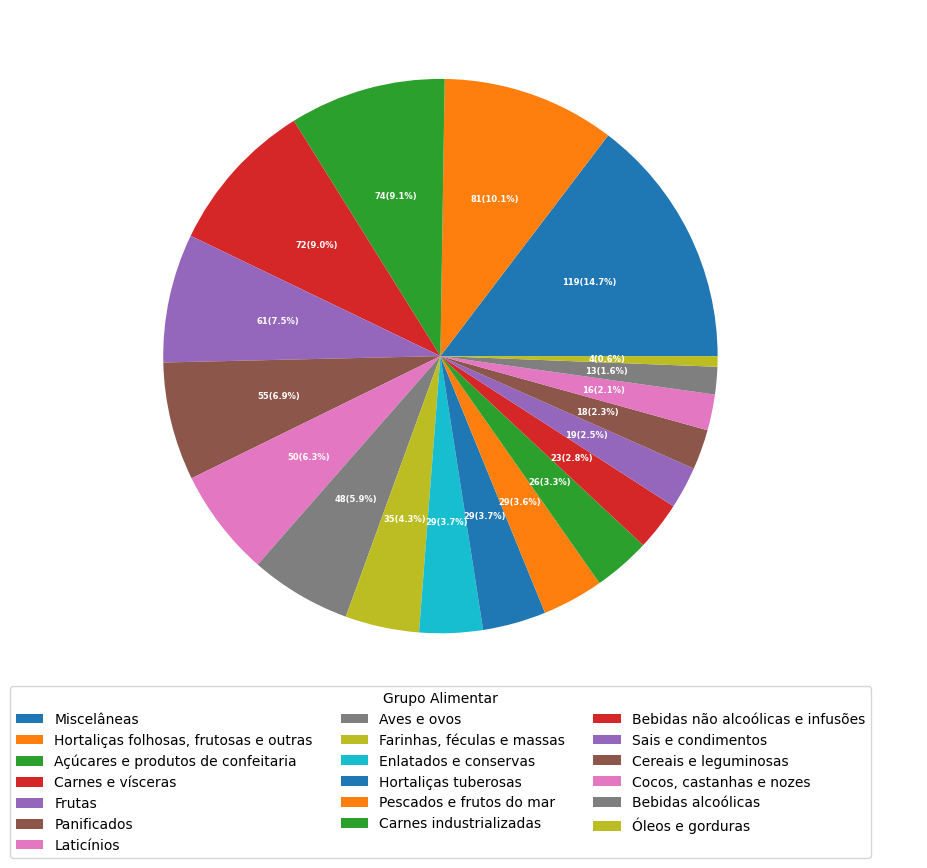

In [ ]:
fig, ax = plt.subplots(figsize=(9,9), subplot_kw=dict(aspect="equal"))
wedges, text, autotext = ax.pie(df_count, labels=df_count.index, autopct=lambda pct: qtda_perc_format(pct, df_count), textprops=dict(color="w"))
# wedges, text, autotext = ax.pie(df_count, labels=df_count.index, autopct='{:d}', textprops=dict(color="w"))
ax.legend(wedges,df_count.index, title="Grupo Alimentar", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.setp(autotext, size=6, weight="bold")
# ax.set_title("Quantidade de alimentos por grupo")
plt.show()

## Normalizando ou padronizando as colunas do modelo preditivo

Para este processo de normalização foi utilizado o **Z-Score Scaling** pelos seguintes motivos:
- O Z-Score Scalling consegue trabalhar melhor com os diferentes tipos de escalas entre as variaveis (g, mg, mcg e kcal), transforma os dados para que cada variável tenha média 0 e desvio padrão 1;
- A diferença nas medidas entre as variaveis pode enviezar o modelo preditivo então é necessário normalizar para que todas tenham a mesma relevancia no resultado final;

In [ ]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[df.columns.difference(['Grupo Alimentar'])]);

df_scaled = pd.DataFrame(df_scaled, columns=df.columns.difference(['Grupo Alimentar']))
df_scaled = pd.concat([df_scaled, df['Grupo Alimentar']], axis='columns')
df_scaled

,AG Linoléico (g),AG Linolênico (g),AG Mono (g),AG Poli (g),AG Saturados (g),AG Trans total(g),Açúcar de adição (g),Açúcar total (g),Carboidrato (g),Cobalamina (mcg),...,Selênio (mcg),Sódio (mg),Sódio de adição (mg),Tiamina (mg),Vitamina A (RAE) (mcg),Vitamina C (mg),Vitamina D (mcg),Vitamina E (mg),Zinco (mg),Grupo Alimentar
0,-0.279045,-0.136290,-0.512921,-0.312751,-0.493113,-0.250782,-0.359853,-0.488320,0.378750,-0.194735,...,-0.171991,-0.531595,1.978823,-0.327295,-0.190851,-0.137759,-0.306252,-0.342036,-0.154051,Cereais e leguminosas
1,-0.205207,-0.125596,-0.443352,-0.235356,-0.475181,-0.250782,-0.359853,-0.488320,0.283961,-0.194735,...,-0.171991,-0.531491,1.284728,-0.140429,-0.190851,-0.137759,-0.306252,-0.342036,-0.125130,Cereais e leguminosas
2,0.626119,0.243657,-0.250190,0.585031,-0.353792,-0.227506,-0.359853,-0.281128,0.264952,-0.194735,...,-0.146422,0.050968,1.027913,0.179879,-0.174186,-0.064623,-0.306252,-0.107485,-0.135064,Cereais e leguminosas
3,0.626119,0.243657,-0.250190,0.585031,-0.353792,-0.227506,-0.359853,-0.281128,0.264952,-0.194735,...,-0.146432,-0.534436,1.027913,0.179879,-0.174186,-0.064623,-0.306252,-0.107485,-0.135064,Cereais e leguminosas
4,-0.121058,-0.065233,-0.465883,-0.142130,-0.497037,-0.246447,-0.359853,-0.469634,-0.228849,-0.194735,...,-0.147015,-0.220186,0.201941,-0.079605,-0.188539,-0.137759,-0.306252,-0.293327,-0.208336,Cereais e leguminosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,-0.397260,-0.175397,-0.025013,-0.407357,0.022880,-0.255467,-0.359853,-0.488320,-0.309809,-0.194735,...,-0.176643,3.341752,-0.672618,-0.256527,-0.190851,-0.137759,-0.306252,-0.380054,0.183822,Miscelâneas
808,0.045976,0.049250,-0.378938,0.031649,-0.366650,-0.212173,-0.359853,-0.391936,0.159105,-0.179063,...,-0.089767,0.402000,-0.672618,0.007676,-0.180976,-0.137688,-0.084334,-0.238527,-0.156282,Miscelâneas
809,-0.354558,-0.166644,-0.523653,-0.373081,-0.515810,-0.253124,-0.359853,-0.488320,0.427997,-0.194735,...,-0.176643,-0.531821,1.645657,-0.256527,-0.190851,-0.072291,-0.306252,-0.380054,-0.175927,Miscelâneas
810,0.295681,0.073124,-0.020780,0.274485,-0.116592,-0.240584,-0.359853,-0.444849,-0.186393,-0.116566,...,0.012157,-0.371966,1.364549,-0.242373,-0.074370,-0.137759,0.257046,0.005927,-0.104029,Miscelâneas


In [ ]:
#df_scaled.sum()

## Criando arquivo .csv

In [ ]:
#df.to_csv('Tabela_Taco_Pre_Processada_preditivo.csv', index=False)

In [ ]:
#df_clone.to_csv('Tabela_Taco_Pre_Processada_analise.csv', index=False)

In [ ]:
df_scaled.to_csv('Tabela_Taco_Pre_Processada_preditivo_scaled.csv', index=False)